In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir -p data
!mkdir -p data/orientation
!cp /content/gdrive/"My Drive"/Projects/kuiken-ulcers/physionet-classifier/orientation_dataset.zip data
!unzip data/orientation_dataset.zip -d data/orientation >/dev/null 2>&1

In [0]:
from pathlib import Path
from fastai.vision import *
from fastai.metrics import *

In [0]:
data_path = Path("data/orientation")

In [13]:
data_path.ls()

[PosixPath('data/orientation/left'),
 PosixPath('data/orientation/supine'),
 PosixPath('data/orientation/right')]

In [0]:
batch_size = 24

In [0]:
data = ImageDataBunch.from_folder(
    path=data_path,
    valid_pct=0.2,
    ds_tfms=get_transforms(do_flip=False),
    bs=batch_size
)

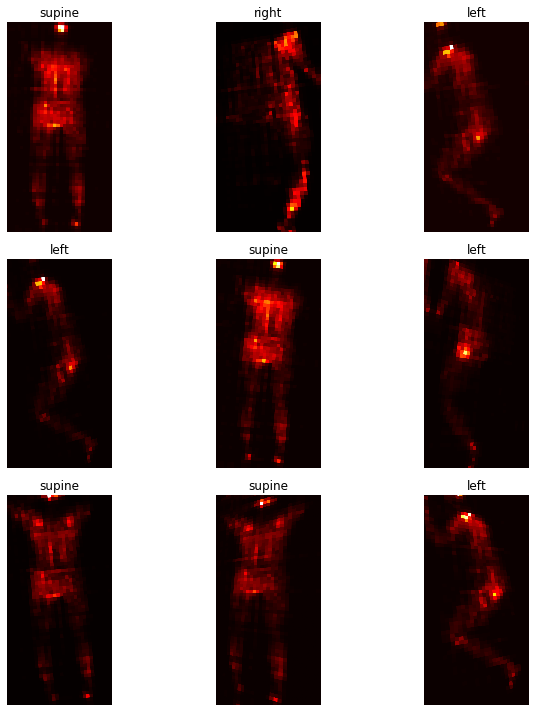

In [21]:
data.show_batch(rows=3, figsize=(10,10))

In [22]:
print(data.classes)

['left', 'right', 'supine']


In [23]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 27.6MB/s]


In [24]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.681993,0.099618,0.985591,01:26
1,0.299381,0.083538,0.988473,01:20
2,0.161027,0.166224,0.979827,01:23
3,0.132460,0.081760,0.979827,01:23


In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save("initial-training")

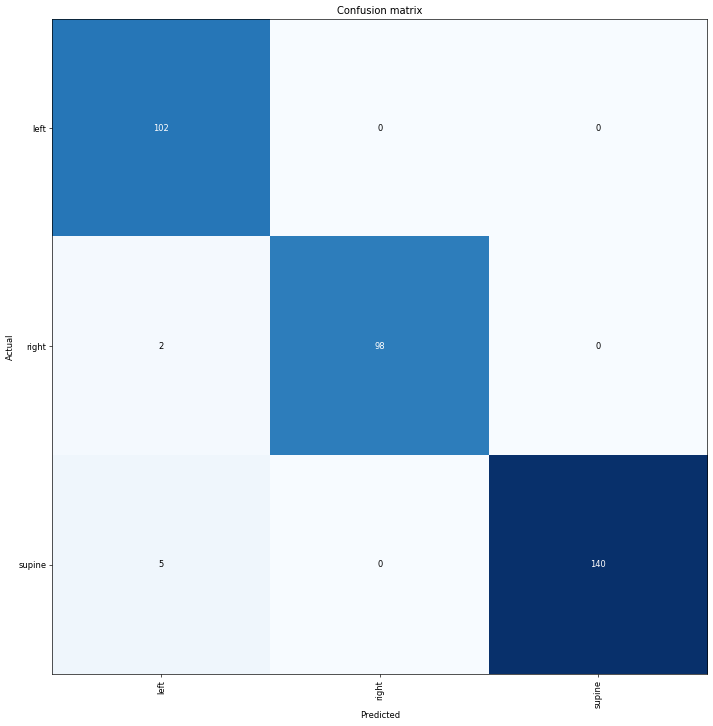

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


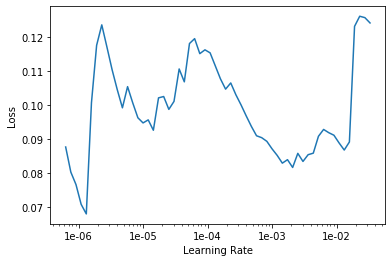

In [30]:
learn.recorder.plot()

In [31]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.291824,1.597319,0.804035,01:42
1,0.171718,0.155558,0.982709,01:40


In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save("second-training")

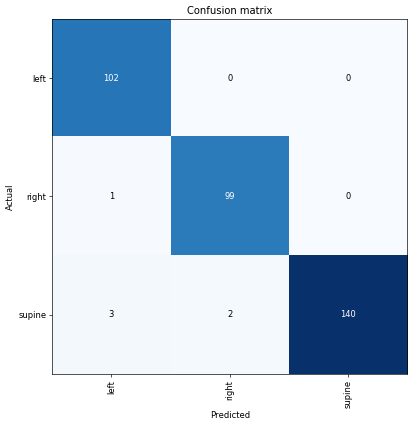

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

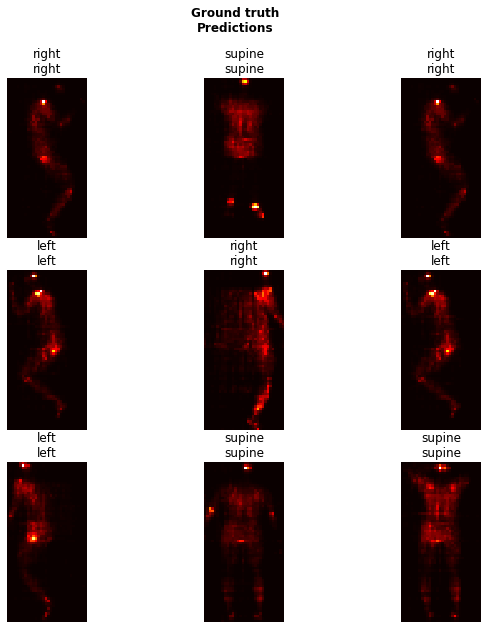

In [34]:
learn.show_results(rows=3, figsize=(10,10))